# Background 

This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015. 

I will perform a sentiment analysis on Amazon and IMDB to see whether people left positive or negative feedback. 

The data can be found here: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
%matplotlib inline

In [2]:
# Start with amazon review first.
amazon_reviews = pd.read_csv('amazon_cells_labelled.txt', delimiter='\t')

# If you run .head() without doing anything, we will only see two columns, 
# comments and a number ( 0 or 1). 
# lets look only at positive reviews.
# Clean the data a little bit.
amazon_reviews.columns = ['reviews', 'positive']
amazon_reviews['clean_review'] = amazon_reviews['reviews'].str.lower()
amazon_reviews['positive'] = (amazon_reviews['positive'] == 1)

print(amazon_reviews.head())

                                             reviews  positive  \
0                        Good case, Excellent value.      True   
1                             Great for the jawbone.      True   
2  Tied to charger for conversations lasting more...     False   
3                                  The mic is great.      True   
4  I have to jiggle the plug to get it to line up...     False   

                                        clean_review  
0                        good case, excellent value.  
1                             great for the jawbone.  
2  tied to charger for conversations lasting more...  
3                                  the mic is great.  
4  i have to jiggle the plug to get it to line up...  


In [3]:
# Lets take a look at the data now and see if I can find any words to use for the keywords. 
#print(amazon_reviews.head(50))

reviews_pos = amazon_reviews.query('positive == True')
reviews_neg = amazon_reviews.query('positive == False')

# Finding more inspiration.
reviews_pos[120:200]

,reviews,positive,clean_review
235,best bluetooth on the market.,True,best bluetooth on the market.
236,Authentic leather with nice shine and comfort ...,True,authentic leather with nice shine and comfort ...
237,I was very excited to get this headset because...,True,i was very excited to get this headset because...
244,Worth every penny.,True,worth every penny.
245,Excellent wallet type phone case.,True,excellent wallet type phone case.
246,Nice headphones for the price and they work gr...,True,nice headphones for the price and they work gr...
248,"It is very comfortable to wear as well, which ...",True,"it is very comfortable to wear as well, which ..."
249,"It's fits like a glove and is strong, secure, ...",True,"it's fits like a glove and is strong, secure, ..."
250,O my gosh the best phone I have ever had.,True,o my gosh the best phone i have ever had.
251,It's very attractive and appears to be of good...,True,it's very attractive and appears to be of good...


In [4]:
# Increase the amount of keywords and add negative reviews too.
keywords = ['excellent','nice', 'fantastic', 'adorable', 'helpful', 'great', 'love', 
           'well', 'wonderful', 'ideal', 'quick', 'best', 'fair', 'better', 'awesome',
           'tremendous', 'fast', 'comfortable', 'bargain', 'pleased', 'brilliant',
           'superb', 'incredible', 'love', 'cheap', 'unusable', 'horrible', 'useless',
           'bad', 'terrible', 'poor', 'problem', 'broke', 'unhappy', 'good',
           'attractive']



for key in keywords:
    amazon_reviews[str(key)] = amazon_reviews.clean_review.str.contains(
        str(key),
        case=False
    )

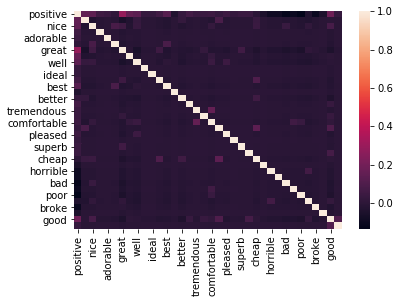

In [5]:
# Time to check if the keywords are correlated; if not, then proceed with the Bernoulli NB
sns.heatmap(amazon_reviews.corr())

None of the keywords have a correlation over .5, it's safe to proceed.

In [6]:
data = amazon_reviews[keywords]
target = amazon_reviews['positive']

In [7]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
# Initially this was 60% accurate. Let see if i can increase it. print((747-298)/747)
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled reviews out of a total {} reviews : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
print("This model's accuracy is now " + str(1 - (248/999)))

Number of mislabeled reviews out of a total 999 reviews : 248
This model's accuracy is now 0.7517517517517518


# Holdout Groups

In [8]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.775
Testing on Sample: 0.7517517517517518


- I didn't include all the data in my training set in order to make my evaluation more reliable. 
- The scores look consistent so it means that the model isn't overfitted. 

# Cross Validation

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.8       , 0.77      , 0.81      , 0.74      , 0.73      ,
       0.72      , 0.67      , 0.72      , 0.76      , 0.64646465])

My scores are somewhat consistent for the most part but it seems my model is overfitting at a variable amount.

# Using the Gaussian Approach

In [10]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Fit our model to the data.
data = amazon_reviews[keywords]
gnb.fit(data, target)
# Classify, storing the result in a new variable.
y_pred = gnb.predict(data)
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

print('It seems like the NB binomial approach was more accurate.')

Number of mislabeled points out of a total 999 points : 299
It seems like the NB binomial approach was more accurate.


# Evaluating IMDB

In [11]:
# Try this classifier on IMDB.

imdb_reviews = pd.read_csv('imdb_labelled.txt', delimiter='\t')

# Same thing as before, need to add column names to both columns.
imdb_reviews.columns = ['reviews', 'positive']
imdb_reviews['clean_review'] = imdb_reviews['reviews'].str.lower()
imdb_reviews['positive'] = (imdb_reviews['positive'] == 1)

In [12]:
#print(imdb_reviews.head(180))

reviews_pos = imdb_reviews.query('positive == True')
reviews_neg = imdb_reviews.query('positive == False')

# Finding more inspiration.
reviews_pos[200:300]
#reviews_neg[50:100]

,reviews,positive,clean_review
461,This is a witty and delightful adaptation of t...,True,this is a witty and delightful adaptation of t...
462,Special mention should be made of the superb m...,True,special mention should be made of the superb m...
463,"However Paul Schrader has indeed made a film ""...",True,"however paul schrader has indeed made a film ""..."
464,Also notable is John Bailey's fine crisp beaut...,True,also notable is john bailey's fine crisp beaut...
467,"If you do watch it, however, there are small c...",True,"if you do watch it, however, there are small c..."
471,This is a stunning movie.,True,this is a stunning movie.
472,Raw and sublimely moving.,True,raw and sublimely moving.
473,"It felt like a very gripping, intelligent stag...",True,"it felt like a very gripping, intelligent stag..."
474,All of the main players are mesmerising.,True,all of the main players are mesmerising.
475,Tom Wilkinson broke my heart at the end... and...,True,tom wilkinson broke my heart at the end... and...


In [17]:
# Second time, time to edit the features. 
keywords = ['good', 'excellent','great', 'nice', 'awesome', 'fantastic',
           'well', 'wonderful', 'ideal', 'quick', 'best', 'delight',
           'good', 'bad', 'unfunny', 'hilarious', 'classic', 'cool','predictable',
           'problem', 'witty', 'pleased', 'memorable', 'worth', 'loved',
           'ridiculous', 'annoying', 'irritating', 'bad', 'torture',
            'lame', 'stupid', 'original', 'humorous', 'entertaining',
           'excellent', 'clever', 'beautiful', 'compelling',
           'inspiring', 'phenomenal']

for key in keywords:
    imdb_reviews[str(key)] = imdb_reviews.clean_review.str.contains(
        str(key),
        case=False
    )

In [ ]:
# Time to check if the keywords are correlated; if not, then proceed with the Bernoulli NB
sns.heatmap(imdb_reviews.corr())

Correlation is higher here, but it luckily still hasn't broken .5 so it's still useable.

In [19]:
data = imdb_reviews[keywords]
target = imdb_reviews['positive']

In [21]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
# Previously, this model's accuracy was only 60%
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of positive reviews out of a total {} reviews : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

print('The accuracy of this model is ' + str((1- (282/747))))
print('I added a lot more features but I still can not raise the accuracy any higher.')

Number of positive reviews out of a total 747 reviews : 282
The accuracy of this model is 0.6224899598393574
I added a lot more features but I still can not raise the accuracy any higher.


# Holdout Groups

In [23]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))
print('At least my model is consistent and does not seem to suffer from overfitting so far.')

With 20% Holdout: 0.6266666666666667
Testing on Sample: 0.6224899598393574
At least my model is consistent and does not seem to suffer from overfitting so far.


# Cross Validation 

In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)
print('Looks like my variables might be overfitting a little bit.')

array([0.64473684, 0.57333333, 0.69333333, 0.65333333, 0.68      ,
       0.6       , 0.54054054, 0.59459459, 0.5       , 0.62162162])

# Using the Multinomial Approach

In [29]:
# Would using another method increase accuracy? 

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# Fit our model to the data.
data = imdb_reviews[keywords]
mnb.fit(data, target)
# Classify, storing the result in a new variable.
y_pred = mnb.predict(data)
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
print('At least my results are consistent.')

Number of mislabeled points out of a total 747 points : 284
At least my results are consistent.


- For this assignment, I used all three of the different classifier models, Bernoulli, Gaussian and Multinomial. 
- None of my classifiers seem to overfit too much, but they aren't especially accurate either which is a shame. 
- The Bernoulli classifier seemed to do the best probably due to the fact that NB is the simplest model out of the three. 
- My strongest feature is also my only feature, keywords. The strongest variable in there was probably the word that showed up the most in the data set. 